In [281]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [282]:
df=pd.read_csv("C:\\Users\\KIIT\\Desktop\\HRC_Project\\Final.csv") #creating and loading dataset, TASK 1

In [283]:
dupl=df.duplicated(subset='CUSTOMER_ORDER_ID')
print("Total Duplicate Rows in 'CUSTOMER_ORDER_ID': ",len(df[dupl]))
print(df.shape[0])
print(df["CUSTOMER_ORDER_ID"].nunique())
x=df.shape[0]-df["CUSTOMER_ORDER_ID"].nunique()
print("Duplicacies in CUSTOMER_ORDER_ID: ",x)

Total Duplicate Rows in 'CUSTOMER_ORDER_ID':  2480
1101925
1099445
Duplicacies in CUSTOMER_ORDER_ID:  2480


In [284]:
df.drop_duplicates(subset='CUSTOMER_ORDER_ID', keep=False, inplace=True)
df.head()  #removing duplicacies present in Primary key "CUSTOMER_ORDER_ID"
df.shape[0]-df["CUSTOMER_ORDER_ID"].nunique() 

0

In [285]:
df.dropna(subset=["PURCHASE_ORDER_TYPE"], inplace=True)

In [286]:
df=df.drop(columns=['CREDIT_STATUS'])

In [287]:
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format='%Y%m%d')
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format='%Y%m%d')
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",2022-01-13,EUR,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",2022-01-11,EUR,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",2022-01-12,EUR,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",2022-01-06,EUR,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",2022-01-06,EUR,1210351400


In [288]:
df.drop(df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']].index,inplace=True)

In [289]:
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].replace(',', '.', regex=True)
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].replace('-', '', regex=True)
df["RELEASED_CREDIT_VALUE"] = df["RELEASED_CREDIT_VALUE"].replace([',','-'], '.', regex=True)

In [290]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].astype(float) #firstly converting object type to float value
rates = {'EUR': 1.22,'AED': 0.27,'CHF': 1.11,'CZK': 0.045,'GBP': 1.42,'RON': 0.24,'USD': 1.0,'PLN': 0.26,   
    'HU1': 0.0036,'SAR': 0.27,'BHD': 2.65,'KWD': 3.32,'QAR': 0.27,'SEK': 0.11,'CAD': 0.82,'HKD': 0.13,'AUD': 0.76,   
    'MYR': 0.24,'SGD': 0.74,'NZD': 0.70 }
def convert(amount, currency):
    if currency == 'USD':
        return amount
    elif currency in rates:
        return amount*rates[currency]
    else:
        return None
df['amount_in_usd'] = df.apply(lambda row: convert(row['ORDER_AMOUNT'], row['ORDER_CURRENCY']), axis=1)
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER,amount_in_usd
0,946851639,3537,United States of America,South-Region,0.00,1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,12311807,1164.6242
1,963432061,3449,Martinique,South-Region,0.00,1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,12311807,960.5792
2,971991639,3238,Moldova,South-Region,82342.02,I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,12118758,82342.0212
3,754349803,3911,United Arab Emirates,South-Region,1471.24,N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,1210499770,1714.7588
4,930253442,2381,Greece,South-Region,0.00,N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,1210351400,0.0000


In [291]:
import random
grp1 = df.groupby(['CUSTOMER_NUMBER', 'COMPANY_CODE'])
def generate_unique_key():
    return random.randint(0, df.shape[0])
df['unique_cust_id'] = grp1['COMPANY_CODE'].transform(lambda x: generate_unique_key())
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,0.00,1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,12311807,1164.6242,484063
1,963432061,3449,Martinique,South-Region,0.00,1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,12311807,960.5792,484063
2,971991639,3238,Moldova,South-Region,82342.02,I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,12118758,82342.0212,334662
3,754349803,3911,United Arab Emirates,South-Region,1471.24,N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,1210499770,1714.7588,1046454
4,930253442,2381,Greece,South-Region,0.00,N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,1210351400,0.0000,691707


In [292]:
df_copy=df

In [293]:
df_copy.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,0.00,1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,12311807,1164.6242,484063
1,963432061,3449,Martinique,South-Region,0.00,1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,12311807,960.5792,484063
2,971991639,3238,Moldova,South-Region,82342.02,I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,12118758,82342.0212,334662
3,754349803,3911,United Arab Emirates,South-Region,1471.24,N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,1210499770,1714.7588,1046454
4,930253442,2381,Greece,South-Region,0.00,N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,1210351400,0.0000,691707


In [294]:
q1_usd=df['amount_in_usd'].describe()['25%']
q3_usd=df['amount_in_usd'].describe()['75%']
iqr_usd=q3_usd-q1_usd             #finding Interquartile Range
print(iqr_usd)

752.4344


In [295]:
lower_usd=q1_usd-1.5*iqr_usd
upper_usd=q3_usd+1.5*iqr_usd

In [296]:
outliers_usd = df["amount_in_usd"][(df["amount_in_usd"] < lower_usd) | (df["amount_in_usd"] > upper_usd)]
print("Number of outliers:", len(outliers_usd))

Number of outliers: 98451


In [297]:
df = df.drop(outliers_usd.index).reset_index(drop=True)

In [298]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["DIVISION"] = le.fit_transform(df["DIVISION"])+1
df["CREDIT_CONTROL_AREA"]=le.fit_transform(df["CREDIT_CONTROL_AREA"])+1
df["ORDER_CURRENCY"]=le.fit_transform(df["ORDER_CURRENCY"])+1          
df["COMPANY_CODE"]=le.fit_transform(df["COMPANY_CODE"])+1
df["DISTRIBUTION_CHANNEL"]=le.fit_transform(df["DISTRIBUTION_CHANNEL"])+1
df["PURCHASE_ORDER_TYPE"]=le.fit_transform(df["PURCHASE_ORDER_TYPE"])+1

In [299]:
exclude_columns = ['ORDER_CURRENCY', 'CREDIT_CONTROL_AREA', 'DIVISION','COMPANY_CODE',
                   'DISTRIBUTION_CHANNEL','PURCHASE_ORDER_TYPE','unique_cust_id','CUSTOMER_ORDER_ID',
                  'ORDER_CREATION_MONTH','ORDER_CREATION_DAY'] 
#we won't tranform these column because it will not help in any way, like normalization,linearization etc

continuous_columns = df.select_dtypes(include=np.number).columns.tolist()  # Identify continuous columns
#and storing them in to list format

continuous_columns = [col for col in continuous_columns if col not in exclude_columns]
# Exclude specific columns from continuous columns list

#log transformation to continuous columns
df[continuous_columns] = np.log(df[continuous_columns])  #log transformation to continuous columns
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,8.171034,233,2,0.00,1,12,2022-01-01,10.669234,6,20.443739,6.861303,2022-01-13,7,16.326069,7.060154,484063
1,963432061,8.145840,136,2,0.00,1,12,2022-01-01,10.671603,3,20.498681,6.668686,2022-01-11,7,16.326069,6.867536,484063
2,754349803,8.271548,229,2,1471.24,241,15,2022-01-01,11.938278,6,20.646231,7.248177,2022-01-06,7,20.914299,7.447028,1046454
3,930253442,7.775276,83,2,0.00,241,15,2022-01-01,11.983054,5,20.669805,-inf,2022-01-06,7,20.914177,-inf,691707
4,819741436,8.190077,10,2,0.00,255,15,2022-01-01,11.983073,4,20.484181,6.971040,2022-01-07,7,20.913989,7.169891,476306


In [300]:
inf_count = (df == -np.inf).sum()

#total count of -inf occurrences for each column
print("Total -inf count in each column:")
print(inf_count)

Total -inf count in each column:
CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE             0
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             1
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT               236249
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CUSTOMER_NUMBER                 0
amount_in_usd              236249
unique_cust_id                  0
dtype: int64


In [301]:
df['ORDER_CURRENCY'] = df['ORDER_CURRENCY'].replace(-np.inf, 1.00)

In [302]:
valid_values = df.loc[df['ORDER_AMOUNT'] != -np.inf, 'ORDER_AMOUNT']

In [303]:
mean_value=valid_values.mean()
mean_value

5.752191504055686

In [304]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].replace(-np.inf, mean_value)

In [305]:
valid_values_usd = df.loc[df['amount_in_usd'] != -np.inf, 'amount_in_usd']

In [306]:
median_value_usd = valid_values_usd.median()
median_value_usd

5.9063967347179185

In [307]:
df['amount_in_usd'] = df['amount_in_usd'].replace(-np.inf, median_value_usd)

In [308]:
df["ORDER_CREATION_TIME"]=df["ORDER_CREATION_TIME"].replace(-np.inf,np.nan)  
df.dropna(inplace=True)

In [309]:
inf_count = (df == -np.inf).sum()
print(inf_count)

CUSTOMER_ORDER_ID          0
SALES_ORG                  0
DISTRIBUTION_CHANNEL       0
DIVISION                   0
RELEASED_CREDIT_VALUE      0
PURCHASE_ORDER_TYPE        0
COMPANY_CODE               0
ORDER_CREATION_DATE        0
ORDER_CREATION_TIME        0
CREDIT_CONTROL_AREA        0
SOLD_TO_PARTY              0
ORDER_AMOUNT               0
REQUESTED_DELIVERY_DATE    0
ORDER_CURRENCY             0
CUSTOMER_NUMBER            0
amount_in_usd              0
unique_cust_id             0
dtype: int64


In [310]:
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,8.171034,233,2,0.00,1,12,2022-01-01,10.669234,6,20.443739,6.861303,2022-01-13,7,16.326069,7.060154,484063
1,963432061,8.145840,136,2,0.00,1,12,2022-01-01,10.671603,3,20.498681,6.668686,2022-01-11,7,16.326069,6.867536,484063
2,754349803,8.271548,229,2,1471.24,241,15,2022-01-01,11.938278,6,20.646231,7.248177,2022-01-06,7,20.914299,7.447028,1046454
3,930253442,7.775276,83,2,0.00,241,15,2022-01-01,11.983054,5,20.669805,5.752192,2022-01-06,7,20.914177,5.906397,691707
4,819741436,8.190077,10,2,0.00,255,15,2022-01-01,11.983073,4,20.484181,6.971040,2022-01-07,7,20.913989,7.169891,476306


In [321]:
import pandas as pd
from datetime import datetime
def calculate_time_features(df, start, end, date_col, customer_col, sales_col):
    df = df.sort_values(date_col)
    
    
    df['Last_day_sales'] = 0
    df['Last_day_diff'] = 0
    df['Year'] = 0
    df['Month'] = 0
    df['Week'] = 0
    df['Day'] = 0
    df['Day_of_week'] = 0
    df['Day_of_year'] = 0
    df['Is_month_end'] = False
    df['Is_month_start'] = False
    df['Is_quarter_end'] = False
    df['Is_quarter_start'] = False
    df['Is_year_end'] = False
    df['Is_year_start'] = False
    
    for i in range(start, end+1):
        # Calculate last day sales
        df['Last_day_sales'] = df.groupby(customer_col)[sales_col].shift(i).fillna(0)
        
        # Calculate last day difference
        df['Last_day_diff'] = df.groupby(customer_col)['Last_day_sales'].diff().fillna(0)
        
        # Extract time features
        df['Year'] = df[date_col].dt.year
        df['Month'] = df[date_col].dt.month
        df['Week'] = df[date_col].dt.week
        df['Day'] = df[date_col].dt.day
        df['Day_of_week'] = df[date_col].dt.dayofweek
        df['Day_of_year'] = df[date_col].dt.dayofyear
        df['Is_month_end'] = df[date_col].dt.is_month_end
        df['Is_month_start'] = df[date_col].dt.is_month_start
        df['Is_quarter_end'] = df[date_col].dt.is_quarter_end
        df['Is_quarter_start'] = df[date_col].dt.is_quarter_start
        df['Is_year_end'] = df[date_col].dt.is_year_end
        df['Is_year_start'] = df[date_col].dt.is_year_start
    
    return df


start = 1
end = 3
date_col = 'ORDER_CREATION_DATE'
customer_col = 'unique_cust_id'
sales_col = 'amount_in_usd'

df = calculate_time_features(df, start, end, date_col, customer_col, sales_col)
df = df.sort_values(date_col)  # Sort DataFrame by 'ORDER_CREATION_DATE'
df = df.reset_index(drop=True)  # Reset index after sorting

df.head()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_1272\4091229877.py:32: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df[date_col].dt.week
C:\Users\KIIT\AppData\Local\Temp\ipykernel_1272\4091229877.py:32: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df[date_col].dt.week
C:\Users\KIIT\AppData\Local\Temp\ipykernel_1272\4091229877.py:32: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df[date_col].dt.week


,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,Last_day_sales,Last_day_diff,Year,Month,Week,Day,Day_of_week,Day_of_year,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,946851639,8.171034,233,2,0.00,1,12,2022-01-01,10.669234,6,20.443739,6.861303,2022-01-13,7,16.326069,7.060154,484063,0.000000,0.000000,2022,1,52,1,5,1,False,True,False,True,False,True
1,801492770,8.355850,193,1,0.00,320,24,2022-01-01,11.991833,4,20.619493,6.674081,2022-01-11,17,20.930292,6.674081,648748,6.900831,1.978226,2022,1,52,1,5,1,False,True,False,True,False,True
2,945898381,8.160518,226,1,0.00,320,24,2022-01-01,10.604404,5,20.676581,5.860501,2022-01-11,17,20.930292,5.860501,1030959,0.000000,0.000000,2022,1,52,1,5,1,False,True,False,True,False,True
3,808734454,8.375169,141,1,0.00,320,24,2022-01-01,11.513065,2,20.469140,4.643333,2022-01-14,17,20.930292,4.643333,648748,4.922605,-1.658796,2022,1,52,1,5,1,False,True,False,True,False,True
4,791798584,8.107419,103,1,0.00,320,24,2022-01-01,11.983035,3,20.682717,6.931989,2022-01-10,17,20.930292,6.931989,648748,6.581402,0.011948,2022,1,52,1,5,1,False,True,False,True,False,True


In [396]:
boolean_columns = ['Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
df[boolean_columns] = df[boolean_columns].astype(int)

In [397]:
pd.set_option('display.max_columns', None)
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,Last_day_sales,Last_day_diff,Year,Month,Week,Day,Day_of_week,Day_of_year,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Avg Sales/Day,Product Interaction,Seasonality Interaction,Sales to price Ratio,Square_root_Last_day_sales,Month_Progress,Daily_Sales_Change,Avg_Sales_Per_Day_x,Avg_Sales_Per_Day_y,rolling_mean,rolling_std,lag_1_amount,lag_7_amount,monthly_sum,weekly_mean,time_since_last_order,month,quarter,day_of_week,total_order_amount,order_count,average_order_amount
1,801492770,8.355850,193,1,0.00,320,24,2022-01-01,11.991833,4,20.619493,6.674081,2022-01-11,17,20.930292,6.674081,648748,6.900831,1.978226,2022,1,52,1,5,1,0,1,0,1,0,1,6.900831,13.651405,52,3.488394,2.626943,0.032258,6.900831,97.039096,97.039096,5.906397,0.742805,5.906397,5.906397,1.040007e+06,6.202598,0.0,1,1,5,12986.741496,2494,5.207194
3,808734454,8.375169,141,1,0.00,320,24,2022-01-01,11.513065,2,20.469140,4.643333,2022-01-14,17,20.930292,4.643333,648748,4.922605,-1.658796,2022,1,52,1,5,1,0,1,0,1,0,1,4.922605,-8.165600,52,-2.967576,2.218694,0.032258,4.922605,97.039096,97.039096,5.906397,0.742805,6.674081,5.906397,1.040007e+06,6.202598,0.0,1,1,5,12986.741496,2494,5.207194
4,791798584,8.107419,103,1,0.00,320,24,2022-01-01,11.983035,3,20.682717,6.931989,2022-01-10,17,20.930292,6.931989,648748,6.581402,0.011948,2022,1,52,1,5,1,0,1,0,1,0,1,6.581402,0.078637,52,550.822977,2.565424,0.032258,1.658796,97.039096,97.039096,5.906397,0.742805,4.643333,5.906397,1.040007e+06,6.202598,0.0,1,1,5,12986.741496,2494,5.207194
5,766285206,7.951559,41,1,0.00,320,24,2022-01-01,11.984459,8,20.698554,6.900831,2022-01-11,17,20.930292,6.900831,648748,6.569453,-0.206609,2022,1,52,1,5,1,0,1,0,1,0,1,6.569453,-1.357307,52,-31.796577,2.563094,0.032258,-0.011948,97.039096,97.039096,5.906397,0.742805,6.931989,5.906397,1.040007e+06,6.202598,0.0,1,1,5,12986.741496,2494,5.207194
6,931698777,8.077758,117,1,0.00,320,24,2022-01-01,11.985071,1,20.594441,4.922605,2022-01-12,17,20.930292,4.922605,648748,6.776062,0.255691,2022,1,52,1,5,1,0,1,0,1,0,1,6.776062,1.732581,52,26.500932,2.603087,0.032258,0.206609,97.039096,97.039096,5.906397,0.742805,6.900831,5.906397,1.040007e+06,6.202598,0.0,1,1,5,12986.741496,2494,5.207194


In [314]:
summary_stats = df[['amount_in_usd', 'Last_day_sales', 'Last_day_diff', 'Year', 'Month', 'Week', 'Day', 'Day_of_week', 'Day_of_year']].describe()
print(summary_stats)


       amount_in_usd  Last_day_sales  Last_day_diff      Year          Month  \
count  952904.000000   952904.000000  952904.000000  952904.0  952904.000000   
mean        5.741430        5.638796       0.025553    2022.0       3.014045   
std         1.088882        1.313018       1.040361       0.0       1.436503   
min        -4.406319       -4.406319     -10.312716    2022.0       1.000000   
25%         5.423535        5.361749      -0.345935    2022.0       2.000000   
50%         5.906397        5.906397       0.000000    2022.0       3.000000   
75%         6.348169        6.326882       0.361768    2022.0       4.000000   
max         7.546573        7.546573      10.312716    2022.0       6.000000   

                Week            Day    Day_of_week    Day_of_year  
count  952904.000000  952904.000000  952904.000000  952904.000000  
mean       11.295529      15.486857       2.411508      75.893044  
std         6.676603       8.627659       1.855322      42.974614  
min    

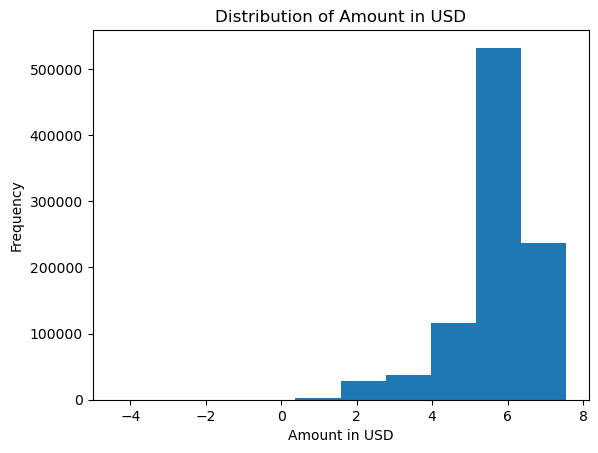

In [315]:
import matplotlib.pyplot as plt

plt.hist(df['amount_in_usd'], bins=10)
plt.xlabel('Amount in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Amount in USD')
plt.show()


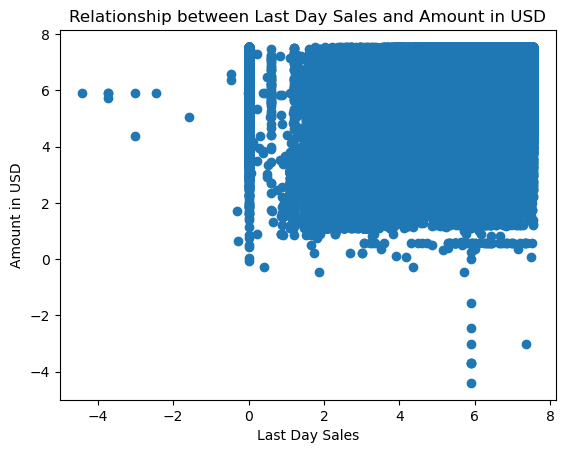

In [316]:
plt.scatter(df['Last_day_sales'], df['amount_in_usd'])
plt.xlabel('Last Day Sales')
plt.ylabel('Amount in USD')
plt.title('Relationship between Last Day Sales and Amount in USD')
plt.show()


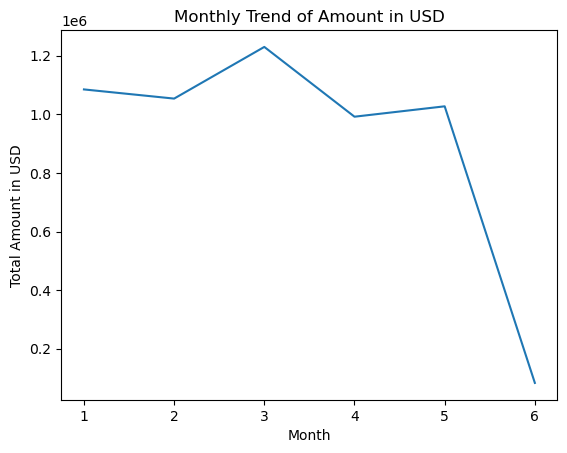

In [317]:
monthly_amount = df.groupby(['Year', 'Month'])['amount_in_usd'].sum().reset_index()
plt.plot(monthly_amount['Month'], monthly_amount['amount_in_usd'])
plt.xlabel('Month')
plt.ylabel('Total Amount in USD')
plt.title('Monthly Trend of Amount in USD')
plt.show()


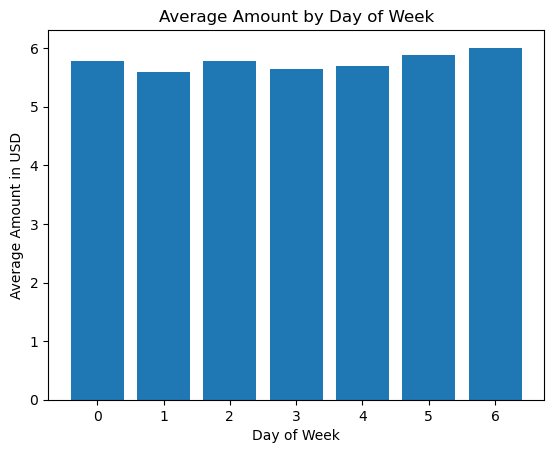

In [318]:
avg_amount_by_day = df.groupby('Day_of_week')['amount_in_usd'].mean().reset_index()
plt.bar(avg_amount_by_day['Day_of_week'], avg_amount_by_day['amount_in_usd'])
plt.xlabel('Day of Week')
plt.ylabel('Average Amount in USD')
plt.title('Average Amount by Day of Week')
plt.show()


In [319]:
df.shape

(952904, 31)

In [320]:
df.isnull().sum()

CUSTOMER_ORDER_ID          0
SALES_ORG                  0
DISTRIBUTION_CHANNEL       0
DIVISION                   0
RELEASED_CREDIT_VALUE      0
PURCHASE_ORDER_TYPE        0
COMPANY_CODE               0
ORDER_CREATION_DATE        0
ORDER_CREATION_TIME        0
CREDIT_CONTROL_AREA        0
SOLD_TO_PARTY              0
ORDER_AMOUNT               0
REQUESTED_DELIVERY_DATE    0
ORDER_CURRENCY             0
CUSTOMER_NUMBER            0
amount_in_usd              0
unique_cust_id             0
Last_day_sales             0
Last_day_diff              0
Year                       0
Month                      0
Week                       0
Day                        0
Day_of_week                0
Day_of_year                0
Is_month_end               0
Is_month_start             0
Is_quarter_end             0
Is_quarter_start           0
Is_year_end                0
Is_year_start              0
dtype: int64

In [324]:
df.columns

Index(['CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL', 'DIVISION',
       'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'COMPANY_CODE',
       'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME', 'CREDIT_CONTROL_AREA',
       'SOLD_TO_PARTY', 'ORDER_AMOUNT', 'REQUESTED_DELIVERY_DATE',
       'ORDER_CURRENCY', 'CUSTOMER_NUMBER', 'amount_in_usd', 'unique_cust_id',
       'Last_day_sales', 'Last_day_diff', 'Year', 'Month', 'Week', 'Day',
       'Day_of_week', 'Day_of_year', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'],
      dtype='object')

In [339]:
df['Avg Sales/Day']=df['Last_day_sales']/df['Day']
df['Product Interaction']=df['Last_day_sales']*df['Last_day_diff']
df['Seasonality Interaction']=df['Month']*df['Week']
df['Sales to price Ratio']=df['Last_day_sales']/df['Last_day_diff']
df['Square_root_Last_day_sales'] = np.sqrt(df['Last_day_sales'])
df['Month_Progress'] = df['Day'] / df['Day'].max()
df['Daily_Sales_Change'] = df['Last_day_sales'].diff()
grouped = df.groupby(['CUSTOMER_NUMBER', 'ORDER_CREATION_DATE'])['amount_in_usd'].sum().reset_index()
avg_sales_per_day = grouped.groupby('CUSTOMER_NUMBER')['amount_in_usd'].mean().reset_index()
avg_sales_per_day.columns = ['CUSTOMER_NUMBER', 'Avg_Sales_Per_Day']
df = pd.merge(df, avg_sales_per_day, on='CUSTOMER_NUMBER', how='left')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [364]:
import pandas as pd

# Assume you have a DataFrame called 'df' with the relevant columns including 'amount_in_usd' and 'ORDER_CREATION_DATE'

# Rolling Statistics
df['rolling_mean'] = df['amount_in_usd'].rolling(window=7).mean()
df['rolling_std'] = df['amount_in_usd'].rolling(window=30).std()

# Lagged Features
df['lag_1_amount'] = df['amount_in_usd'].shift(1)
df['lag_7_amount'] = df['amount_in_usd'].shift(7)

# Time-based Aggregations
df['monthly_sum'] = df.groupby(pd.Grouper(key='ORDER_CREATION_DATE', freq='M'))['amount_in_usd'].transform('sum')
df['weekly_mean'] = df.groupby(pd.Grouper(key='ORDER_CREATION_DATE', freq='W'))['amount_in_usd'].transform('mean')

# Time since Last Order
df['time_since_last_order'] = df.groupby('CUSTOMER_NUMBER')['ORDER_CREATION_DATE'].diff().dt.days

# Seasonality Features
df['month'] = df['ORDER_CREATION_DATE'].dt.month
df['quarter'] = df['ORDER_CREATION_DATE'].dt.quarter
df['day_of_week'] = df['ORDER_CREATION_DATE'].dt.dayofweek

# Historical Order Summaries
df['total_order_amount'] = df.groupby('CUSTOMER_NUMBER')['amount_in_usd'].transform('sum')
df['order_count'] = df.groupby('CUSTOMER_NUMBER')['amount_in_usd'].transform('count')
df['average_order_amount'] = df['total_order_amount'] / df['order_count']


In [365]:
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,Last_day_sales,Last_day_diff,Year,Month,Week,Day,Day_of_week,Day_of_year,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Avg Sales/Day,Product Interaction,Seasonality Interaction,Sales to price Ratio,Square_root_Last_day_sales,Month_Progress,Daily_Sales_Change,Avg_Sales_Per_Day_x,Avg_Sales_Per_Day_y,rolling_mean,rolling_std,lag_1_amount,lag_7_amount,monthly_sum,weekly_mean,time_since_last_order,month,quarter,day_of_week,total_order_amount,order_count,average_order_amount
1,801492770,8.355850,193,1,0.00,320,24,2022-01-01,11.991833,4,20.619493,6.674081,2022-01-11,17,20.930292,6.674081,648748,6.900831,1.978226,2022,1,52,1,5,1,False,True,False,True,False,True,6.900831,13.651405,52,3.488394,2.626943,0.032258,6.900831,97.039096,97.039096,NaN,NaN,NaN,NaN,1.040007e+06,6.202598,NaN,1,1,5,12986.741496,2494,5.207194
3,808734454,8.375169,141,1,0.00,320,24,2022-01-01,11.513065,2,20.469140,4.643333,2022-01-14,17,20.930292,4.643333,648748,4.922605,-1.658796,2022,1,52,1,5,1,False,True,False,True,False,True,4.922605,-8.165600,52,-2.967576,2.218694,0.032258,4.922605,97.039096,97.039096,NaN,NaN,6.674081,NaN,1.040007e+06,6.202598,0.0,1,1,5,12986.741496,2494,5.207194
4,791798584,8.107419,103,1,0.00,320,24,2022-01-01,11.983035,3,20.682717,6.931989,2022-01-10,17,20.930292,6.931989,648748,6.581402,0.011948,2022,1,52,1,5,1,False,True,False,True,False,True,6.581402,0.078637,52,550.822977,2.565424,0.032258,1.658796,97.039096,97.039096,NaN,NaN,4.643333,NaN,1.040007e+06,6.202598,0.0,1,1,5,12986.741496,2494,5.207194
5,766285206,7.951559,41,1,0.00,320,24,2022-01-01,11.984459,8,20.698554,6.900831,2022-01-11,17,20.930292,6.900831,648748,6.569453,-0.206609,2022,1,52,1,5,1,False,True,False,True,False,True,6.569453,-1.357307,52,-31.796577,2.563094,0.032258,-0.011948,97.039096,97.039096,NaN,NaN,6.931989,NaN,1.040007e+06,6.202598,0.0,1,1,5,12986.741496,2494,5.207194
6,931698777,8.077758,117,1,0.00,320,24,2022-01-01,11.985071,1,20.594441,4.922605,2022-01-12,17,20.930292,4.922605,648748,6.776062,0.255691,2022,1,52,1,5,1,False,True,False,True,False,True,6.776062,1.732581,52,26.500932,2.603087,0.032258,0.206609,97.039096,97.039096,NaN,NaN,6.900831,NaN,1.040007e+06,6.202598,0.0,1,1,5,12986.741496,2494,5.207194


In [366]:
correlation_matrix = df.corr()

# Retrieve the correlation values with 'amount_in_usd'
correlation_with_amount = correlation_matrix['amount_in_usd']

print(correlation_with_amount)

CUSTOMER_ORDER_ID            -0.000575
SALES_ORG                     0.000306
DISTRIBUTION_CHANNEL          0.001045
DIVISION                      0.051139
PURCHASE_ORDER_TYPE           0.017303
COMPANY_CODE                  0.052680
ORDER_CREATION_TIME          -0.028883
CREDIT_CONTROL_AREA          -0.000926
SOLD_TO_PARTY                 0.001562
ORDER_AMOUNT                  0.951046
ORDER_CURRENCY                0.029659
CUSTOMER_NUMBER              -0.025797
amount_in_usd                 1.000000
unique_cust_id                0.016440
Last_day_sales                0.596465
Last_day_diff                 0.010936
Year                               NaN
Month                         0.001525
Week                          0.013105
Day                           0.000106
Day_of_week                   0.061115
Day_of_year                   0.001315
Is_month_end                  0.001860
Is_month_start                0.021107
Is_quarter_end                0.002547
Is_quarter_start         

In [367]:
df.columns

Index(['CUSTOMER_ORDER_ID', 'SALES_ORG', 'DISTRIBUTION_CHANNEL', 'DIVISION',
       'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'COMPANY_CODE',
       'ORDER_CREATION_DATE', 'ORDER_CREATION_TIME', 'CREDIT_CONTROL_AREA',
       'SOLD_TO_PARTY', 'ORDER_AMOUNT', 'REQUESTED_DELIVERY_DATE',
       'ORDER_CURRENCY', 'CUSTOMER_NUMBER', 'amount_in_usd', 'unique_cust_id',
       'Last_day_sales', 'Last_day_diff', 'Year', 'Month', 'Week', 'Day',
       'Day_of_week', 'Day_of_year', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Avg Sales/Day', 'Product Interaction', 'Seasonality Interaction',
       'Sales to price Ratio', 'Square_root_Last_day_sales', 'Month_Progress',
       'Daily_Sales_Change', 'Avg_Sales_Per_Day_x', 'Avg_Sales_Per_Day_y',
       'rolling_mean', 'rolling_std', 'lag_1_amount', 'lag_7_amount',
       'monthly_sum', 'weekly_mean', 'time_since_last_order', 'month',
       'quarter', 'day_of_week', 'total

In [376]:
df = df.replace([np.inf, -np.inf], np.nan)  #replacing +inf/-inf with median, if occurs!
df = df.fillna(df.median()) 
df.dropna(inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_1272\1380954218.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.median())
C:\Users\KIIT\AppData\Local\Temp\ipykernel_1272\1380954218.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [392]:
sel=[]
X=df[sel]
y=df['amount_in_usd']

In [393]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=656)

In [394]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients and intercept of the linear regression model
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-5.03345953e-12  4.27638090e-05  5.90946483e-06 -1.44927455e-02
  3.97222657e-04  2.28143672e-02  1.71556911e-02 -1.57529097e-05
 -2.36731037e-03  8.46289510e-01 -1.96993526e-02 -6.57173756e-02
 -7.30601348e-08 -1.46146037e-01 -5.50177259e-02 -6.02589825e-10
  2.05930779e-01  1.06928866e-03  1.36851699e-02 -3.41223807e-03
 -1.36471470e-02  1.16413447e-02 -1.61714432e-02  4.00986927e-02
 -1.26582023e-02  2.53339016e-14 -3.70300073e-02  4.36819343e-03
  7.21634133e-03 -3.32943275e-04 -1.18942432e-07  8.02291729e-01
  4.41457095e-04  5.05743224e-03  1.09033644e-05  1.09034065e-05
  1.01564170e-01 -4.73823342e-02 -1.48539983e-02 -1.01615336e-02
 -4.41328186e-08 -5.44395654e-02  1.24332309e-03  2.05930772e-01
  4.83108865e-03 -3.41223807e-03 -6.71013574e-06  3.95434576e-05
  2.20257272e-01]
Intercept: -1.0353058997420135


In [395]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error of Testing Dataset:", mse)
print("Root Mean Squared Error of Testing Dataset:", rmse)
print("R2 Score of Testing Dataset:", (r2*100).round(2),"%")

Mean Squared Error of Testing Dataset: 0.07744424106975271
Root Mean Squared Error of Testing Dataset: 0.27828805412692925
R2 Score of Testing Dataset: 93.54 %
